# 롤에 대해 알아보자
- 학번 : 30401
- 이름 : 김동하

## 1. 주제
- 질문 
    유명한 온라인 게임인 리그 오브 레전드(LOL)의 포지션별 챔피언의 수와 챔피언들의 승률과 픽률이 어떻게 되고, 승률과 픽률 사이에서의 관계가 어떻게 될까

## 2. 데이터 수집
- 데이터 수집 방법 : 웹크롤링
- 데이터 수집 사이트 : https://www.op.gg/champion/statistics

In [87]:
# 데이터 가져오기
import pandas as pd # alias
df = pd.read_csv('LOL_info.csv')

## 3. 탐색적 데이터 분석 과정

#### 표를 활용하여 분석하기

In [342]:
#포지션 전체에서의 승률 순위

df.sort_values(by=['승률(%)'], ascending=False).head()

,챔피언 이름,챔피언 영어 이름,포지션,픽률(%),승률(%)
139,탐 켄치,tahmkench,원딜,0.72,53.54
88,엘리스,elise,정글,12.37,53.30
77,아이번,ivern,정글,0.94,53.28
76,아우렐리온 솔,aurelionsol,미드,0.66,53.14
44,베이가,veigar,미드,0.88,53.13


In [240]:
# 포지션 전체에서의 픽률 순위

df.sort_values(by=['픽률(%)'], ascending=False).head()

,챔피언 이름,챔피언 영어 이름,포지션,픽률(%),승률(%)
122,카이사,kaisa,원딜,34.54,49.78
101,이즈리얼,ezreal,원딜,30.10,48.41
115,징크스,jinx,원딜,25.43,51.95
73,쓰레쉬,thresh,서폿,24.88,52.12
29,리 신,leesin,정글,23.47,49.16


#### 그래프를 활용하여 분석하기

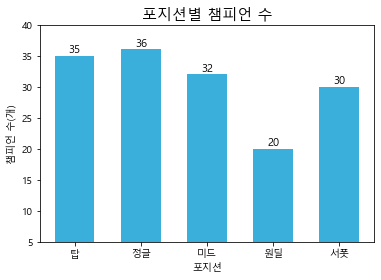

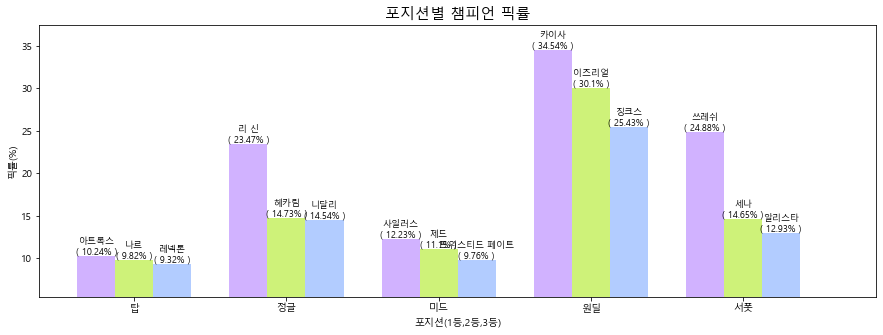

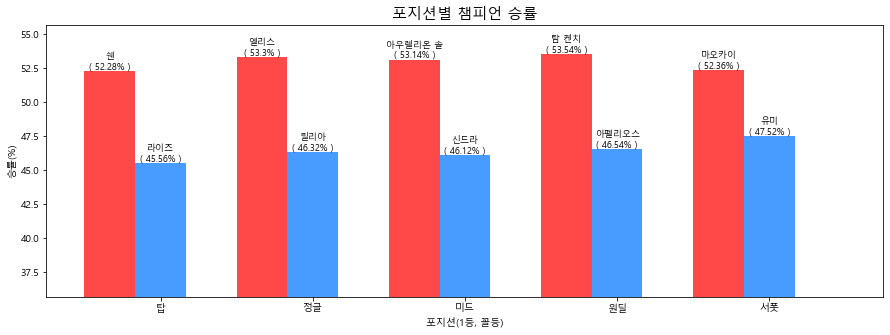

In [343]:
import pandas as pd # pandas를 pd라는 이름으로 사용
import matplotlib.pyplot as plt # matplotlib.pyplot를 plt라는 이름으로  사용
from pandas import Series, DataFrame
from operator import itemgetter


# -- 파일 불러오고, 폰트 설정 -- #

df = pd.read_csv('LOL_info.csv')
plt.rc('font', family='Malgun Gothic')

# ------------------------------ #



# -- 포지션별로 리스트에 담기 -- #

total = []
df_toplane = []
df_jglane = []
df_midlane = []
df_botlane = []
df_supplane = []
cnt = 0

for i in df['포지션']:
    tmp_list = []
    
    # 이름 가져오기
    tmp = str(df.iloc[[cnt],[0]])
    tmp = tmp.replace(f'챔피언 이름\n{cnt}','')
    tmp = tmp.strip()
    tmp_list.append(tmp)
    
    # 픽률 가져오기 
    tmp = str(df.iloc[[cnt],[3]])
    tmp = tmp.replace(f'픽률(%)\n{cnt}','')
    tmp = tmp.strip()
    tmp_list.append(tmp)
    
    # 승률 가져오기
    tmp = str(df.iloc[[cnt],[4]])
    tmp = tmp.replace(f'승률(%)\n{cnt}','')
    tmp = tmp.strip()
    tmp_list.append(tmp)
    
    # 각 포지션별로 리스트에 저장
    if(i == '탑'):
        df_toplane.append(tmp_list)
    elif(i == '정글'):
        df_jglane.append(tmp_list)
    elif(i == '미드'):
        df_midlane.append(tmp_list)
    elif(i == '원딜'):
        df_botlane.append(tmp_list)
    elif(i == '서폿'):
        df_supplane.append(tmp_list)
    cnt+=1

total.append(df_toplane)
total.append(df_jglane)
total.append(df_midlane)
total.append(df_botlane)
total.append(df_supplane)

# ------------------------------ #



# ----- 포지션별 챔피언 수 ----- #

champ_amount = []

# 리스트에 각 포지션별 챔피언 수 저장
for i in range(0,5):
    champ_amount.append(len(total[i]))

# 그래프 그리기
plt.bar(range(5),champ_amount,width=0.6, color = "#3AAFDC")
plt.title('포지션별 챔피언 수',fontsize=15)
plt.xlabel('포지션')
plt.ylabel('챔피언 수(개)')
plt.xticks(range(5),['탑', '정글','미드','원딜','서폿'])
for i in range(0,5):
    plt.text(i, champ_amount[i], str(champ_amount[i]),fontsize=11,horizontalalignment='center',verticalalignment='bottom')
plt.ylim(5, 40)
plt.show()

# ------------------------------ #



# -- 라인별 챔피언 픽률그래프 -- #

# 그래프의 크기 조정
plt.figure(figsize=(15,5))

# 포지션별로 그래프를 그릴 수 있게 반복문을 돌려줌
for i in range(len(total)):
    pick = []
    pick_rate = [] # 그래프를 그릴 때 사용
    
    # pick 리스트에 챔피언의 이름과 픽률만 따로 저장
    for j in range(len(total[i])):
        tmp = []
        tmp.append(total[i][j][0])
        tmp.append(float(total[i][j][1]))
        pick.append(tmp)
    
    # 픽률이 높은 순서로 정렬하기
    pick.sort(key=itemgetter(1), reverse = True)
    
    # pick_rate에 상위 3개의 값만 저장
    for j in range(len(pick)):
        pick_rate.append(pick[j][1])
    pick_rate = pick_rate[0:3]
    
    # 그래프와 그래프 사이의 간격
    pick_rate.append(0)
    
    # 그래프 그리기
    plt.bar(range(i*4,i*4+4),pick_rate, width=1.0, color = ['#D1B2FF','#CEF279','#B2CCFF'])
    plt.title('포지션별 챔피언 픽률',fontsize=15)
    plt.xlabel('포지션(1등,2등,3등)')
    plt.ylabel('픽률(%)')
    plt.xticks(range(1, 20, 4),['탑','정글','미드','원딜','서폿'])
    for j in range(0,4):
        if (j == 3):break
        plt.text(j+i*4,pick_rate[j],str(pick[j][0])+'\n( '+str(pick[j][1])+'% )',fontsize=9,horizontalalignment='center',verticalalignment='bottom')
plt.ylim(5.5, 37.5)
plt.show()

# ------------------------------ #




# ---라인별 챔피언 승률그래프--- #

# 그래프의 크기 조정
plt.figure(figsize=(15,5))

# 포지션별로 그래프를 그릴 수 있게 반복문을 돌려줌
for i in range(len(total)):
    win = []
    win_rate = [] # 그래프를 그릴 때 사용
    
    for j in range(len(total[i])):
        tmp = []
        tmp.append(total[i][j][0])
        tmp.append(float(total[i][j][2]))
        win.append(tmp)
        
    # 승률이 높은 순서대로 정렬
    win.sort(key = lambda x: x[1], reverse = True)
    
    # win_rate에 가장 승률이 높은 값, 낮은 값을 넣어준다.
    win_rate.append(win[0][1])
    win_rate.append(win[-1][1])
    
    # 그래프와 그래프 사이의 간격
    win_rate.append(0)
    
    # 그래프 그리기
    plt.bar(range(i*3,i*3+3),win_rate, width=1.0, color = ['#FF4848','#489CFF'])
    plt.title('포지션별 챔피언 승률',fontsize=15)
    plt.xlabel('포지션(1등, 꼴등)')
    plt.ylabel('승률(%)')
    plt.xticks(range(1, 15, 3),['탑','정글','미드','원딜','서폿'])
    for j in range(0,3):
        tmp = j
        if(j==2):break
        elif(j==1): tmp = -1
        plt.text(j+i*3,win_rate[j],str(win[tmp][0])+'\n( '+str(win[tmp][1])+'% )',fontsize=9,horizontalalignment='center',verticalalignment='bottom')

plt.ylim(35.7, 55.7)
plt.show()

# ------------------------------ #

## 4. 결론

- 질문에 대한 답

1. 포지션 별 챔피언 수는 정글이 36개로 가장 많고, 원딜이 20개로 가장 적다.
2. 원딜은 챔피언 수가 적어서 1, 2, 3위가 모두 20%를 넘는다는 것을 알 수 있다.
3. 포지션별 챔피언 승률 그래프를 보면, 모든 챔피언들의 승률이 40~60% 정도로 차이가 크지 않은 점을 보면 밸런스가 잘 맞다고 볼 수 있다.
4. 픽률이 가장 많은 챔피언과 승률이 가장 높은 챔피언이 같지 않다는 점을 미루어보면 사람들은 굳이 승률이 챔피언만을 골라서 하지 않는다는 결과를 알 수 있다.